In [10]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        #how many layers are present

        #Input layer (4 features)--> h1 (N) --> h2 (N) --> Output (3 classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features= h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features=out_features)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [6]:
#Exploring the dataset
df = pd.read_csv('../Data/iris.csv')
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [9]:
X = df.drop('target', axis=1)
y = df.target

#Converting the X and y to numpy arrays
X = X.values
y = y.values

print(type(X))

<class 'numpy.ndarray'>


In [14]:
print(model.parameters)    #Attribute varaiant of the model parameters

print(model.parameters()) #Generator style variant of the model parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>
<generator object Module.parameters at 0x13b5099e0>


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Defining the loss function of the model
criterion=  nn.CrossEntropyLoss() #multiclasss classification problem

#Optimization function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#Number of epochs to train for
#An epoch is 1 run of the entire training data
epochs = 100
losses = []

for i in range(epochs):

    #Go forward and get a prediction
    y_pred = model.forward(x_train)

    #calculate loss
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    #printing out every 10 loss values
    if i%10==0:
        print("epoch is {}, loss is {}".format(i, losses[i]))


    #performing back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch is 0, loss is 0.06713330745697021
epoch is 10, loss is 0.06468911468982697
epoch is 20, loss is 0.064281165599823
epoch is 30, loss is 0.06112216040492058
epoch is 40, loss is 0.060037970542907715
epoch is 50, loss is 0.058803193271160126
epoch is 60, loss is 0.05763450637459755
epoch is 70, loss is 0.05655588582158089
epoch is 80, loss is 0.0555589385330677
epoch is 90, loss is 0.05462001636624336


Text(0.5, 0, 'Epoch')

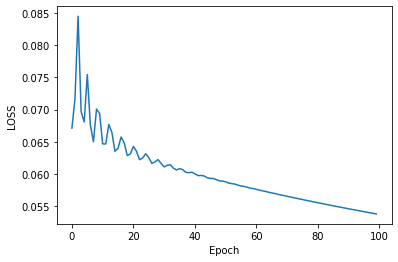

In [21]:
np_losses = [x.detach().numpy() for x in losses]

plt.plot(range(epochs), np_losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [22]:
#evaluate and validating the model
with torch.no_grad():   #deactivate the autograd engine and reduces mem usage and compute time
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)

print(loss)

tensor(0.0420)


In [37]:
#creating an accuracy score based of the outputs generated
correct = 0

print(y_test.size()[0])

with torch.no_grad():

    for i,data in enumerate(x_test):
        y_val = model.forward(data)
        print("{}\t {} \t{}".format(i+1, y_val, y_test[i]))

        #to determine which ones match the index value
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print("The number of correct values are {}".format(correct))

30
1	 tensor([-5.9450,  6.0419, -1.5866]) 	1
2	 tensor([-5.4857,  6.6860, -2.4670]) 	1
3	 tensor([ 10.5242,   1.7310, -12.0736]) 	0
4	 tensor([-9.3604,  5.6492,  0.7928]) 	1
5	 tensor([-16.4189,   3.5212,   6.6947]) 	2
6	 tensor([-22.4846,   1.1247,  11.8597]) 	2
7	 tensor([ 10.3266,   1.9061, -12.1150]) 	0
8	 tensor([ 11.7774,   1.6102, -13.0576]) 	0
9	 tensor([-16.2264,   3.5822,   6.4666]) 	2
10	 tensor([-20.5330,   2.3936,   9.9372]) 	2
11	 tensor([-21.3362,   2.0876,  10.6005]) 	2
12	 tensor([ 10.5121,   1.5128, -11.7877]) 	0
13	 tensor([-20.2838,   1.8742,  10.1061]) 	2
14	 tensor([-9.2530,  5.4738,  0.8538]) 	1
15	 tensor([-17.3189,   3.1724,   7.4106]) 	2
16	 tensor([-5.5013,  6.5064, -2.2830]) 	1
17	 tensor([-13.0667,   3.9866,   4.2512]) 	2
18	 tensor([ 12.0053,   1.6551, -13.3208]) 	0
19	 tensor([-8.6018,  5.7530,  0.2035]) 	1
20	 tensor([-17.4642,   4.0286,   6.8795]) 	2
21	 tensor([ 11.1363,   1.6831, -12.5682]) 	0
22	 tensor([ 12.3374,   1.8570, -13.8763]) 	0
23	 tensor([

In [38]:
#saving the model
torch.save(model.state_dict(), 'my_iris_model.pt') #This saves only the weights and biases

#To save the model as a pickle file use the below line
# torch.save(model, 'my_iris_model.pkl')

In [39]:
#loading the model with defined weights and biases
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [41]:
#using the model on unseen data
mystery_iris = torch.tensor([5.6 , 3.7, 2.2, 0.5])

with torch.no_grad():
    output = new_model.forward(mystery_iris)
    print(output, output.argmax().item())

tensor([  9.6037,   2.4871, -12.0728]) 0
